# Libraries

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
import os 
import random
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns

# Import Data & Data Cleaning

In [3]:
image_data_path = "/kaggle/input/car-crash-or-collision-prediction-dataset/Compressed/dataset"

exel_data_path = "/kaggle/input/car-crash-or-collision-prediction-dataset/Compressed/dataset_database.xlsx"

In [4]:
exel_data = pd.read_excel(exel_data_path)
exel_data.head()

,subject,collision
0,00001.jpg,n
1,00002.jpg,n
2,00003.jpg,n
3,00004.jpg,n
4,00005.jpg,n


In [5]:
label_dict = {row.iloc[0]: 1 if row.iloc[1] == 'y' else 0 for _, row in exel_data.iterrows()} 

raw_data = []

# Process images
for image in tqdm(os.listdir(image_data_path), desc="Processing Rows", unit="row"):
    image_path = os.path.join(image_data_path, image)
    img = plt.imread(image_path)
    img = cv2.resize(img, (224, 224))
    

    label = label_dict.get(image, None) 
    
    if label is not None:
        raw_data.append([img, label])

Processing Rows: 100%|██████████| 10000/10000 [02:58<00:00, 56.07row/s]


In [6]:
x, y = zip(*raw_data)
X_train = np.array(x)[:7500] / 255.0
X_test = np.array(x)[7500:10000] / 255.0
y_train = np.array(y)[:7500]
y_test = np.array(y)[7500:10000]

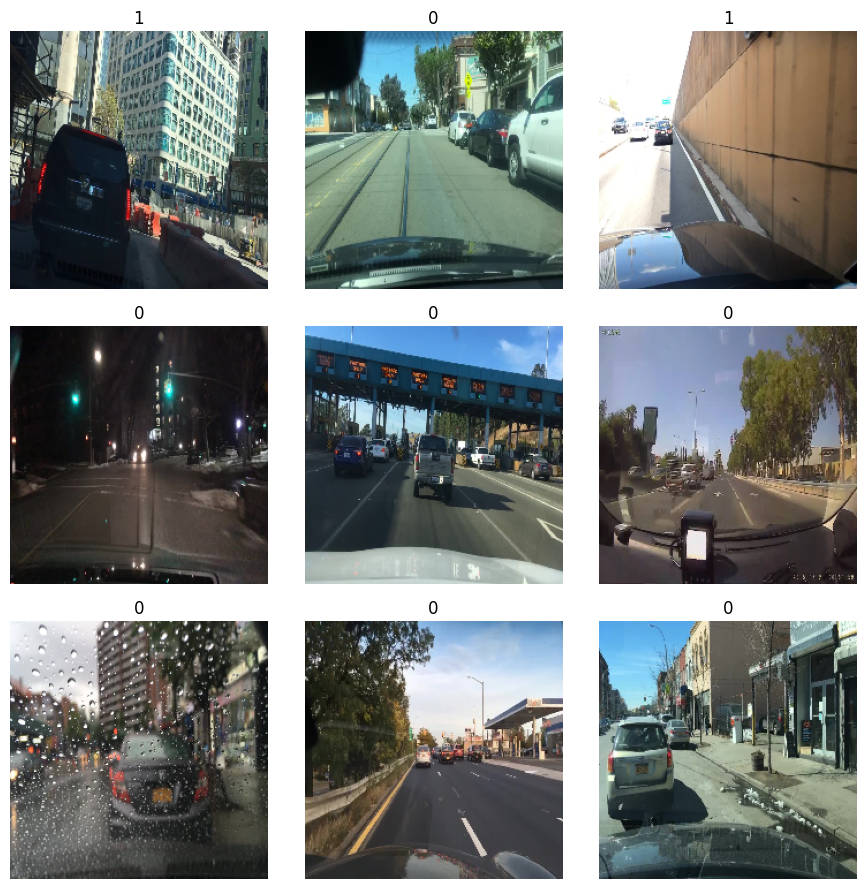

In [7]:
fig, axes = plt.subplots(3, 3, figsize=(9, 9))
axes = axes.flatten()
for ax, img, label in zip(axes, X_train, y_train):
    ax.imshow(img)
    ax.set_title(label)
    ax.axis('off')
plt.tight_layout()
plt.show()

# Model

In [8]:
model = Sequential()

model.add(Conv2D(128, (4, 4), activation="relu", input_shape=(224, 224, 3)))
model.add(MaxPooling2D(3, 3))
model.add(Conv2D(64, (3, 3), activation="relu"))
model.add(MaxPooling2D(3, 3))
model.add(Conv2D(32, (4, 4), activation="relu"))
model.add(MaxPooling2D(3, 3))
model.add(Conv2D(32, (2, 2), activation="relu"))
model.add(MaxPooling2D(3, 3))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 221, 221, 128)  │         6,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 73, 73, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 71, 71, 64)     │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 20, 20, 32)     │        32,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 5, 5, 32)       │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 1, 1, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 129,537 (506.00 KB)

 Trainable params: 129,537 (506.00 KB)

 Non-trainable params: 0 (0.00 B)

# TRAINING

In [10]:
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model.fit(
    X_train, y_train, 
    validation_split=0.2, 
    epochs=20,
    batch_size=24, 
    callbacks=[early_stop]
)

Epoch 1/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 594s 2s/step - accuracy: 0.7950 - loss: 0.5365 - val_accuracy: 0.8007 - val_loss: 0.5021
Epoch 2/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 570s 2s/step - accuracy: 0.7972 - loss: 0.5121 - val_accuracy: 0.8007 - val_loss: 0.4956
Epoch 3/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 620s 2s/step - accuracy: 0.8077 - loss: 0.4895 - val_accuracy: 0.8067 - val_loss: 0.4854
Epoch 4/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 565s 2s/step - accuracy: 0.8078 - loss: 0.4811 - val_accuracy: 0.8027 - val_loss: 0.4744
Epoch 5/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 621s 2s/step - accuracy: 0.7922 - loss: 0.4868 - val_accuracy: 0.8020 - val_loss: 0.4690
Epoch 6/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 563s 2s/step - accuracy: 0.8091 - loss: 0.4565 - val_accuracy: 0.8067 - val_loss: 0.4766
Epoch 7/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 565s 2s/step - accuracy: 0.8142 - loss: 0.4399 - val_accuracy: 0.8080 - val_loss: 0.4590
Epoch 8/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 568s 2s/step - accuracy: 0.8062 - loss: 0.4527 - val_accu

## MODEL LOSS AND ACCURACY

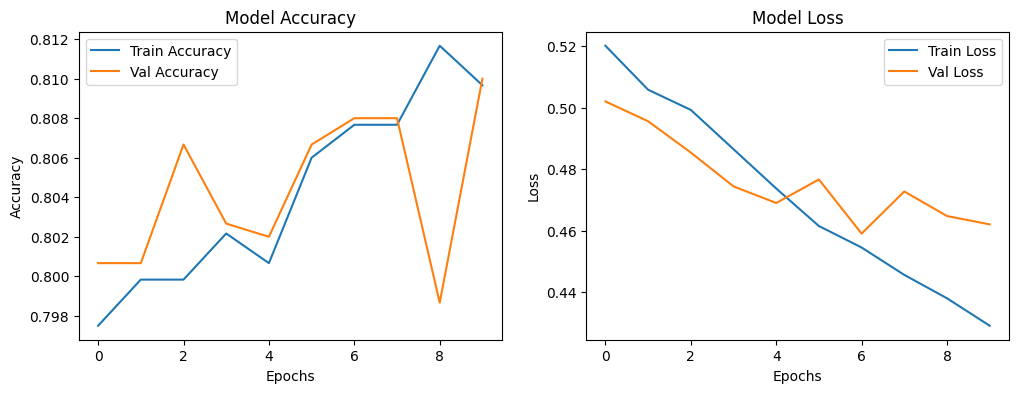

In [11]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


## Y_PRED AND CONF MATRIX

In [12]:
threshold = 0.5
y_pred = (model.predict(X_test)>= threshold).astype(int)

79/79 ━━━━━━━━━━━━━━━━━━━━ 66s 838ms/step


<Figure size 1200x1000 with 0 Axes>

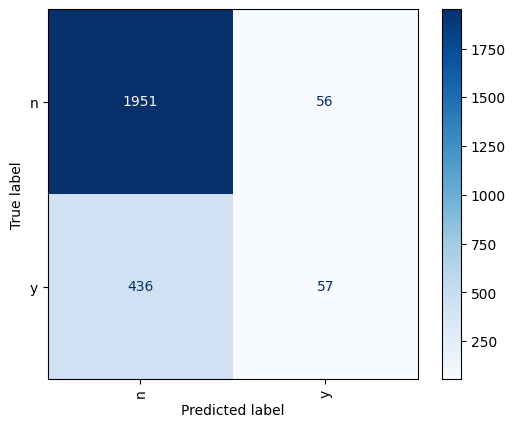

In [13]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12,10))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['n', 'y'])
disp.plot(cmap=plt.cm.Blues)
plt.xticks(rotation=90)
plt.show()

## MODEL EVALUATE

In [14]:
model.evaluate(X_test, y_test)

79/79 ━━━━━━━━━━━━━━━━━━━━ 66s 835ms/step - accuracy: 0.7965 - loss: 0.4632


[0.4612998068332672, 0.8032000064849854]

In [16]:
model_save_path = "crash_collision_model.h5"  # يمكنك تغيير الاسم أو المسار
model.save(model_save_path)
print(f"Model saved at {model_save_path}")

Model saved at crash_collision_model.h5
